In [1]:
import sys
sys.path.append("..")

import matplotlib.pyplot as plt

from src.nn.inference.melody_inference import MelodyInference
from src.data.structures.melody import Melody

In [2]:
split = "test"
file = "verse"

In [3]:
#audio = f"..\\datasets\\melody_extraction\\processed\\{split}\\audio\\{file}.wav"
#midi = f"..\\datasets\\melody_extraction\\processed\\{split}\\labels\\{file}.mid"
midi = f"..\\datasets\\melody_extraction\\raw\\labels\\Verse.mid"

In [4]:
from src.data.datasets.melody_dataset import MelodyDataset
from src.data.datasets.audio_dataset import AudioDataset

dataset = MelodyDataset.from_path(
    "..\\datasets\\melody_extraction\\raw\\",
    hop_size=4,
)

audio_dataset = AudioDataset(dataset.sliced_audio)
audio_dataset.sliced_audio = dataset.sliced_audio

Preprocessing data:   0%|          | 0/2 [00:00<?, ?it/s]d:\Users\Sanya\AppData\Local\Programs\Python\Python310\lib\site-packages\noisereduce\torchgate\torchgate.py:180: UserWarning: Using padding='same' with even kernel lengths and odd dilation may require a zero-padded copy of the input be created (Triggered internally at ..\aten\src\ATen\native\Convolution.cpp:1009.)
  conv1d(
Preprocessing audio: 100%|██████████| 9/9 [00:00<00:00, 81.82it/s]


array([<Axes: xlabel='Время, с', ylabel='Частота, Гц'>,
       <Axes: xlabel='Время, с'>], dtype=object)

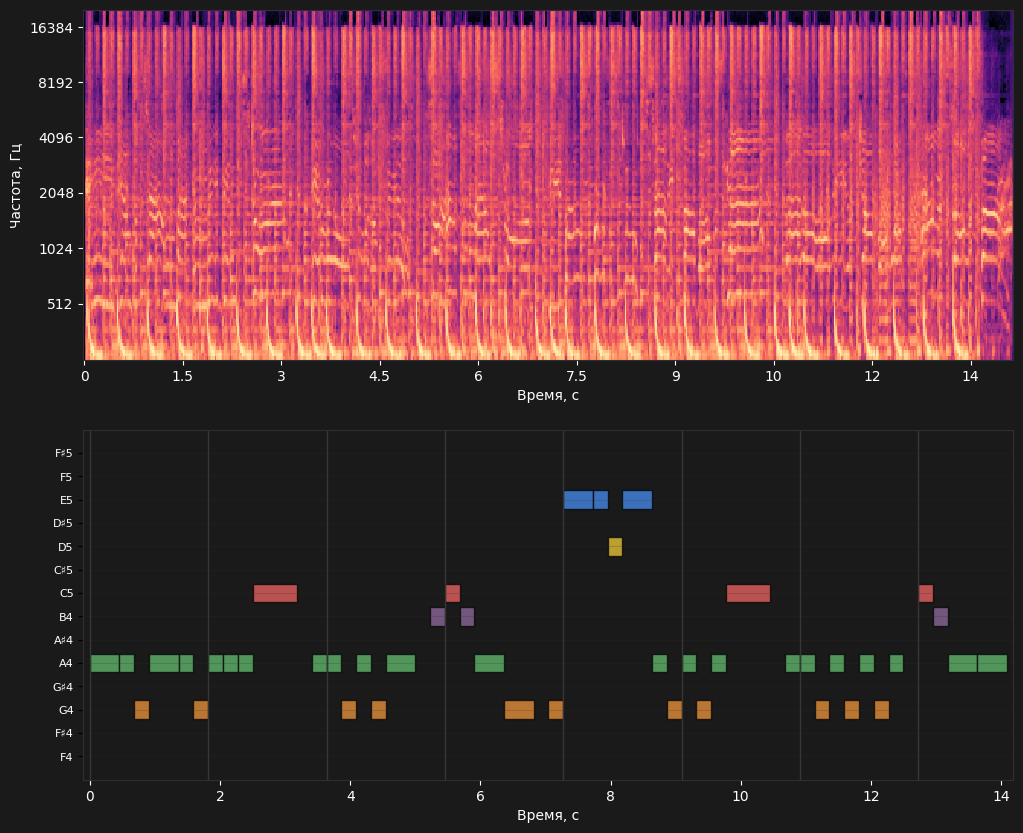

In [5]:
from src.data.structures.sample import Sample

audio = dataset.audio[0]
melody = dataset.melody[0]

sample = Sample(audio, melody)
sample.visualize_with_spectrogram()

In [ ]:
melody_inference = MelodyInference("..\\src\\nn\\logs\\with_lstm_3\\checkpoints\\best.ckpt")

<Axes: xlabel='Время, с'>

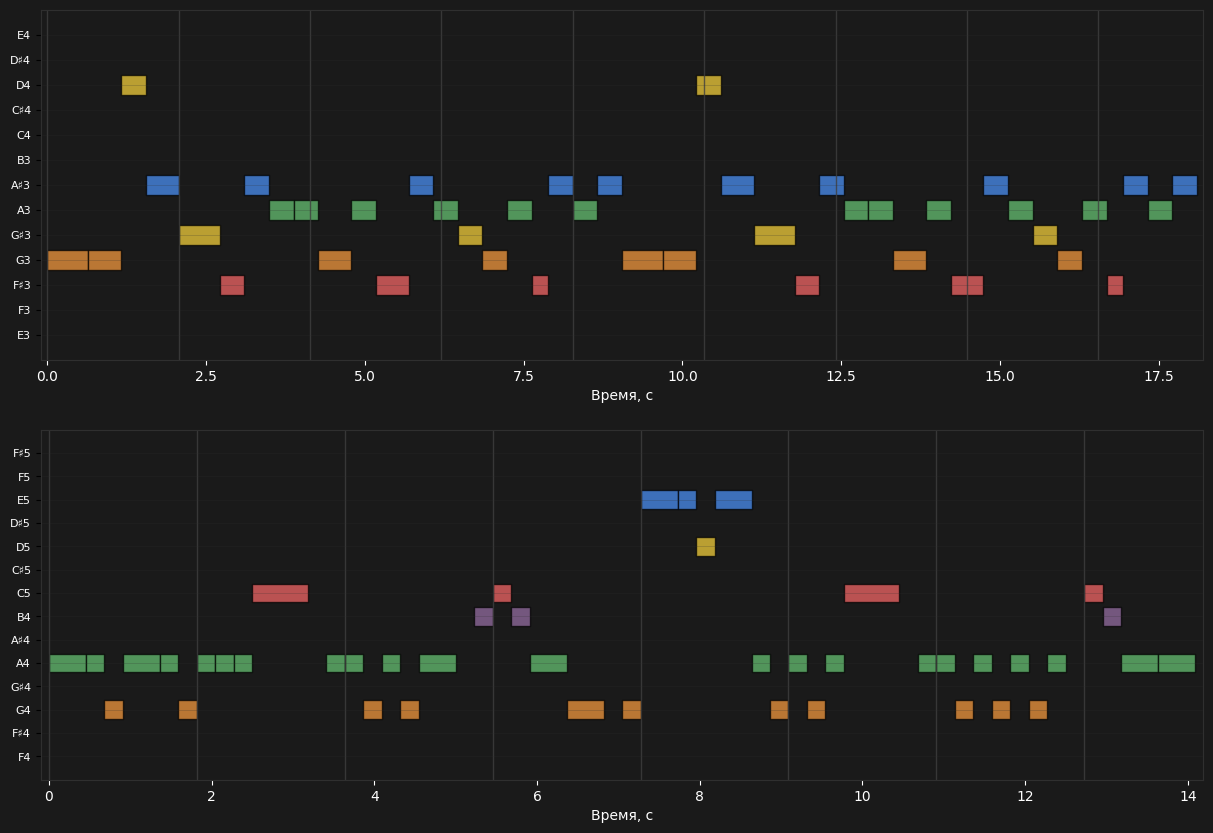

In [7]:
fig, ax = plt.subplots(2, 1, figsize=(15, 10))
fig.patch.set_facecolor('#1A1A1A')

melody = melody_inference.extract_melody(audio_dataset, tempo=116)
melody.visualize(ax=ax[0])

target = Melody.from_midi(midi)
target.visualize(ax=ax[1])